# 3.1 Open Exploration with 17 Objectives Base Case (without Policy)

## 3.1.1 Open Exploration 

17 Objectives, no policy

In [2]:
# load library

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import time
import statistics

from ema_workbench import (Model, RealParameter, ScalarOutcome, MultiprocessingEvaluator, 
                           ema_logging, Constant, Scenario, Policy)
from ema_workbench import load_results
from ema_workbench.analysis import prim, dimensional_stacking, cart
from ema_workbench.util import ema_logging, utilities

from SALib.analyze import sobol
from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

ema_logging.log_to_stderr(ema_logging.INFO)

C:\Users\na0e2\Miniconda3\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)


<Logger EMA (DEBUG)>

In [3]:
# no policy base case

from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation

dike_model, planning_steps = get_model_for_problem_formulation(5)

policies = [Policy("base case without policy", **{k.name: 0 for k in dike_model.levers})]


In [14]:
tic = time.time()

with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=1000, policies=policies)

toc = time.time()

print('Total run time:{} min'.format((toc - tic)/60))

# Save the results
utilities.save_results(results, 'results/base_case_without_policy.csv')


Total run time:0.0 min


[MainProcess/INFO] results saved successfully to C:\Users\na0e2\Documents\EPA1361\epa1361_open-master\final assignment\results\base_case_without_policy.csv


In [4]:
base_results = utilities.load_results('results/base_case_without_policy.csv')

experiments, outcomes = base_results
outcomes = pd.DataFrame(outcomes)
experiments = pd.DataFrame(experiments)

results = experiments.join(outcomes)
results = results.drop(columns="model")
results

[MainProcess/INFO] results loaded succesfully from C:\Users\na0e2\Documents\EPA1361\epa1361_open-master\final assignment\results\base_case_without_policy.csv


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,62.0,84.997178,1.0,0.957652,302.697759,1.0,0.712827,133.589414,1.0,0.238457,...,0,0.662632,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
1,3.0,345.623637,1.0,0.483549,166.050246,10.0,0.286214,79.130315,1.5,0.080464,...,0,1.092732,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
2,130.0,193.012997,1.5,0.653016,224.624180,10.0,0.349210,217.541726,1.5,0.063713,...,0,1.077036,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
3,6.0,115.440169,1.0,0.696211,183.928033,10.0,0.841538,153.686659,10.0,0.919403,...,0,0.023142,2.423024e+06,0,0.001621,3.321234e+07,0,0.037189,0.0,0.0
4,30.0,346.490014,1.0,0.441742,294.524107,1.0,0.485913,313.654161,1.5,0.915752,...,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,27.0,231.934052,1.0,0.896620,269.749043,10.0,0.410018,260.800822,1.0,0.638854,...,0,0.004116,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
996,101.0,326.634235,1.5,0.384356,218.039156,10.0,0.453245,296.384211,1.0,0.581751,...,0,0.000000,0.000000e+00,0,0.000000,1.078552e+08,0,0.068980,0.0,0.0
997,130.0,330.657857,1.5,0.744546,255.491556,1.5,0.202691,167.968988,10.0,0.161231,...,0,0.829496,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
998,113.0,347.754397,1.5,0.699881,57.640404,1.5,0.561584,205.719905,1.0,0.344590,...,0,0.286528,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0


In [5]:
dike_lists = ['A.1', 'A.2', 'A.3', 'A.4', 'A.5']

Time step:0, Expected Annual Damage of each dike


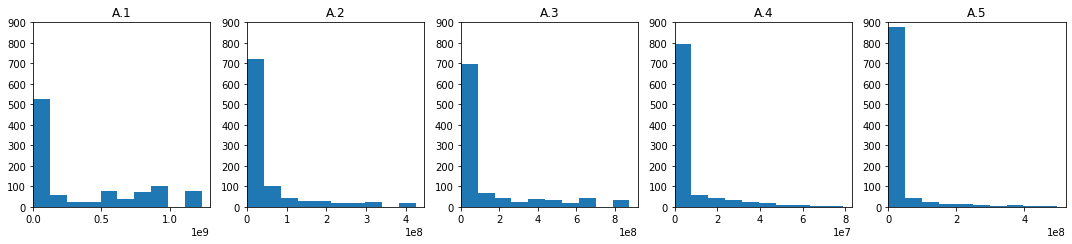

Time step:1, Expected Annual Damage of each dike


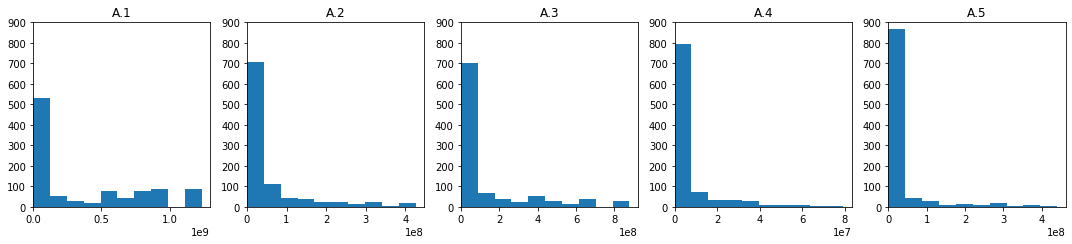

Time step:2, Expected Annual Damage of each dike


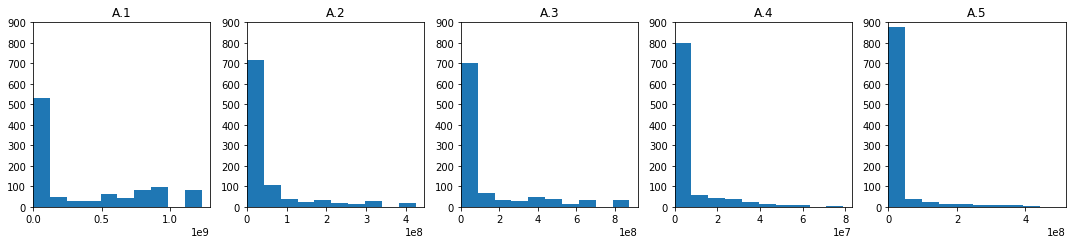

In [5]:
for n in range(3):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3.5))

    print("Time step:" + str(n) + ", Expected Annual Damage of each dike")
    
    for (i, a) in zip(dike_lists, axes.flatten()):
        a.hist(results[str(i) + "_Expected Annual Damage "+str(n)] )
        a.set_xlim(left=0)
        a.set_ylim([0,900])
        a.set_title(i)


    plt.tight_layout()
    plt.show()

Time step:0, Expected Number of Deaths of each dike


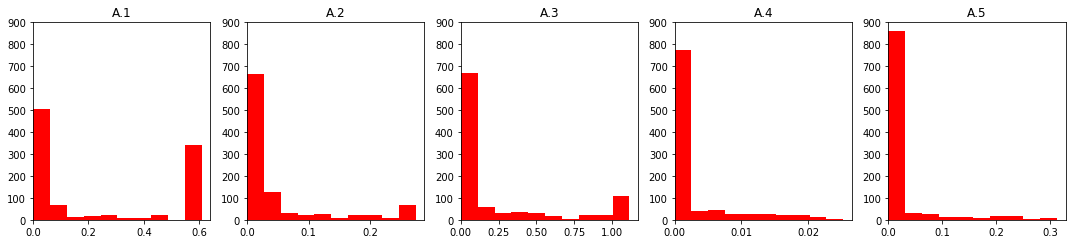

Time step:1, Expected Number of Deaths of each dike


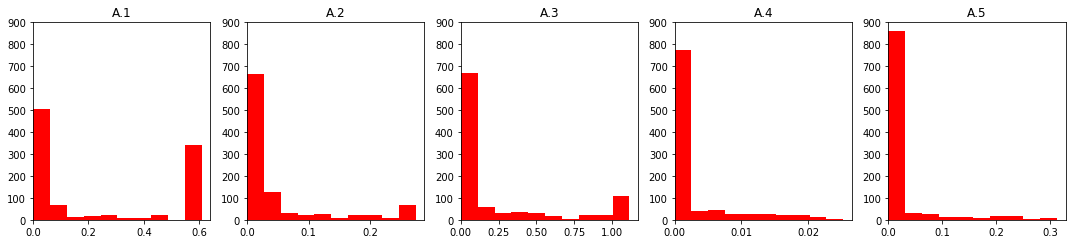

Time step:2, Expected Number of Deaths of each dike


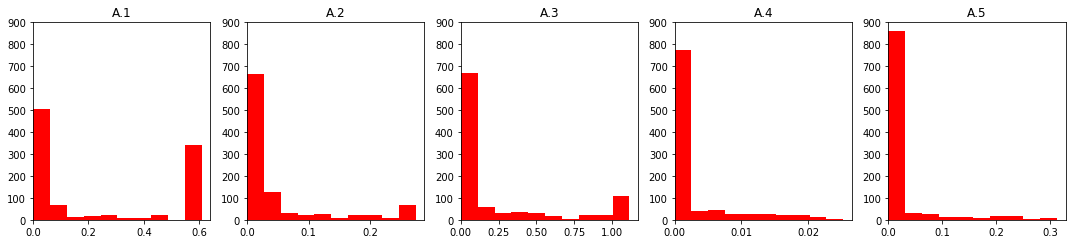

In [6]:
for n in range(3):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3.5))

    print("Time step:" + str(n) + ", Expected Number of Deaths of each dike")
    
    for (i, a) in zip(dike_lists, axes.flatten()):
        a.hist(results[str(i) + "_Expected Number of Deaths "+str(n)] , color = 'red')
        a.set_xlim(left=0)
        a.set_ylim([0,900])
        a.set_title(i)


    plt.tight_layout()
    plt.show()

[355125182.61733544, 50715999.84645771, 132122001.79553422, 5888394.024567844, 23066239.240156006]
[356677389.3222748, 51322983.844300754, 128138638.57111664, 5914134.02125824, 23620981.79066198]
[355922400.5782887, 51594901.78099206, 130599565.90792029, 5724818.063779456, 22971501.38923983]


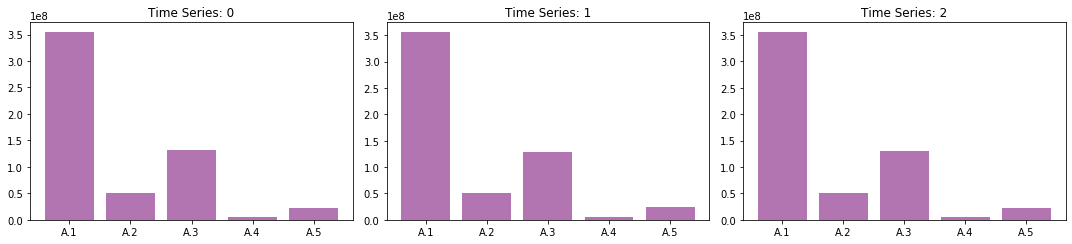

In [7]:
#mean value of expected annual damage of each dike per time serires

fig, axes = plt.subplots(1, 3, figsize=(15, 3.5))
for (n, a) in zip(range(3), axes.flatten()):    
    damage_list = []
    for i in dike_lists:
        damage_list.append(results[str(i) + "_Expected Annual Damage "+str(n)].mean())
        
    damage = pd.DataFrame([damage_list], columns = ["dike1", "dike2", "dike3", "dike4", "dike5"])
    a.bar(dike_lists, damage_list, color = (0.5,0.1,0.5,0.6))
    print(damage_list)
    
    a.set_title("Time Series: "+str(n))
    
plt.tight_layout()
plt.show()


[0.24410375180259933, 0.04593145092856825, 0.22664886664165118, 0.0025775558229184747, 0.020760454665878662]
[0.24410375180259933, 0.04593145092856825, 0.22664886664165118, 0.0025775558229184747, 0.020760454665878662]
[0.24410375180259933, 0.04593145092856825, 0.22664886664165118, 0.0025775558229184747, 0.020760454665878662]


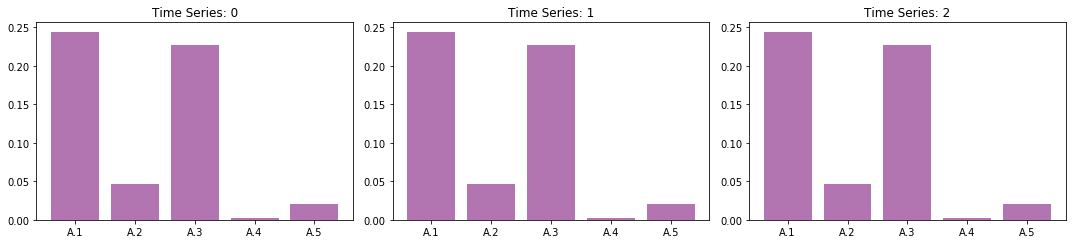

In [8]:
#mean value of Expected Number of Deaths of each dike per time serires

fig, axes = plt.subplots(1, 3, figsize=(15, 3.5))
for (n, a) in zip(range(3), axes.flatten()):    
    damage_list = []
    for i in dike_lists:
        damage_list.append(results[str(i) + "_Expected Number of Deaths "+str(n)].mean())
        
    damage = pd.DataFrame([damage_list], columns = ["dike1", "dike2", "dike3", "dike4", "dike5"])
    a.bar(dike_lists, damage_list, color = (0.5,0.1,0.5,0.6))
    print(damage_list)
    
    a.set_title("Time Series: "+str(n))
    
plt.tight_layout()
plt.show()


## 3.1.2 Sensitivity Analysis using SOBOL
### Uncertainty 

In [108]:
sa_results = utilities.load_results('results/base_case_sobol_1000.csv')

experiments, outcomes = sa_results
    
problem = get_SALib_problem(dike_model.uncertainties)

#Si = sobol.analyze(problem, outcomes[''],
#                   calc_second_order=True, print_to_console=False)
#sa_outcomes = pd.DataFrame(outcomes)
sa_outcomes

[MainProcess/INFO] results loaded succesfully from C:\Users\na0e2\Documents\EPA1361\epa1361_open-master\final assignment\results\base_case_sobol_1000.csv


,Expected Annual Damage,Total Investment Costs,Expected Number of Deaths
0,1.896218e+09,0.0,3.047835
1,1.891853e+09,0.0,3.025667
2,1.896218e+09,0.0,3.047835
3,1.896218e+09,0.0,3.047835
4,1.875939e+09,0.0,3.030570
...,...,...,...
39995,2.692967e+08,0.0,0.230858
39996,2.434438e+08,0.0,0.230858
39997,2.869968e+08,0.0,0.230858
39998,2.515965e+08,0.0,0.230858


In [112]:
O1 = outcomes["Expected Number of Deaths"]
O2 = outcomes["Expected Annual Damage"]
O1

array([3.04783537, 3.02566667, 3.04783537, ..., 0.23085761, 0.23085761,
       0.23085761])

In [114]:
Si_deaths = sobol.analyze(problem, O1, calc_second_order=True, print_to_console=False)
Si_damage = sobol.analyze(problem, O2, calc_second_order=True, print_to_console=False)

In [124]:
# Using the scores presented above for further Sobol sensitivity analysis
# The indices, ST, ST_conf, S1 and S1_conf for each uncertainty on the expected number of deaths will be presented
scores_deaths = {key:Si_deaths[key] for key in ['ST', 'ST_conf', 'S1', 'S1_conf']}
scores_deaths = pd.DataFrame(scores_deaths, index=problem['names'])
scores_deaths = scores_deaths.sort_values(by='S1', ascending=False)
scores_deaths

,ST,ST_conf,S1,S1_conf
A.3_pfail,8.349855e-01,7.397369e-02,0.680762,0.082563
A.1_pfail,2.643134e-01,2.531663e-02,0.147166,0.038014
A.1_Bmax,3.518956e-02,1.070883e-02,0.014412,0.019856
A.2_pfail,3.336846e-02,8.608252e-03,0.010148,0.016648
A.5_pfail,2.212897e-02,3.684313e-03,0.008825,0.012364
A.3_Bmax,2.407058e-04,1.748256e-04,0.000329,0.000914
A.2_Bmax,6.746959e-04,4.310031e-04,0.000296,0.002169
A.4_Bmax,5.149859e-05,6.205498e-05,0.000245,0.000348
A.0_ID flood wave shape,9.027369e-03,2.571225e-03,0.000166,0.008531
A.3_Brate,9.305207e-06,6.188193e-06,0.000060,0.000255


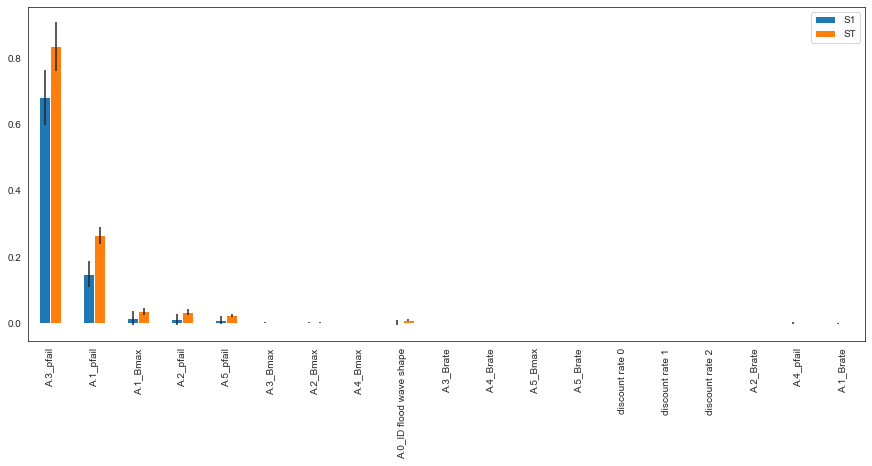

In [125]:
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = scores_deaths[['S1','ST']]
err = scores_deaths[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(15,8)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [126]:
# Using the scores presented above for further Sobol sensitivity analysis
# The indices, ST, ST_conf, S1 and S1_conf for each uncertainty on the expected number of deaths will be presented
scores_damage = {key:Si_damage[key] for key in ['ST', 'ST_conf', 'S1', 'S1_conf']}
scores_damage = pd.DataFrame(scores_damage, index=problem['names'])
scores_damage = scores_damage.sort_values(by='S1', ascending=False)
scores_damage

,ST,ST_conf,S1,S1_conf
A.1_pfail,7.000565e-01,6.942057e-02,0.635196,0.075803
A.3_pfail,2.705101e-01,2.952487e-02,0.221153,0.046797
A.5_pfail,2.845071e-02,5.301188e-03,0.018806,0.015892
discount rate 0,2.341923e-02,2.985085e-03,0.018684,0.014952
discount rate 1,2.413420e-02,3.118288e-03,0.017442,0.015299
discount rate 2,2.337220e-02,2.940985e-03,0.016342,0.014315
A.2_pfail,2.705579e-02,4.094991e-03,0.015055,0.015249
A.1_Bmax,1.531679e-02,4.541698e-03,0.008221,0.012481
A.4_Bmax,7.258634e-05,8.302492e-05,0.000431,0.000585
A.0_ID flood wave shape,5.754110e-03,1.128494e-03,0.000347,0.005777


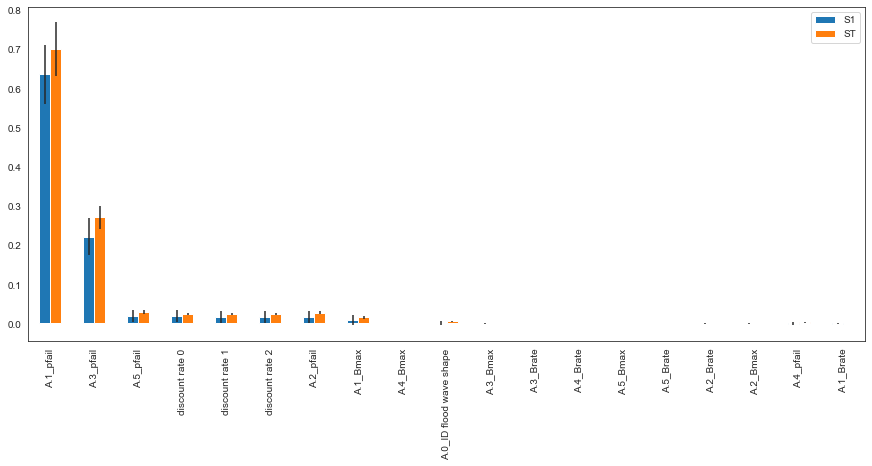

In [127]:
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = scores_damage[['S1','ST']]
err = scores_damage[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(15,8)
fig.subplots_adjust(bottom=0.3)
plt.show()

## 3.1.3  Scenario Discovery

In [9]:
#total demage calculate
damage_column=[]
death_column=[]

for c in results.columns:
    if "Expected Annual Damage" in c:
        damage_column.append(c)

for c in results.columns:
    if "Expected Number of Deaths" in c:
        death_column.append(c)

results["Total Expected Annual Damage"] = results[damage_column].sum(axis=1)
results["Total Expected Number of Deaths"] = results[death_column].sum(axis=1)

total = {'Total Expected Annual Damage': results["Total Expected Annual Damage"], 'Total Expected Number of Deaths': results["Total Expected Number of Deaths"] }
total_results = pd.DataFrame(total)
print(total_results["Total Expected Annual Damage"].mean())
print(total_results["Total Expected Number of Deaths"].mean())

6797620531.175535
6.48026495833939


In [85]:
total_damage_75 = results["Total Expected Annual Damage"].quantile(0.75)
total_death_25 = results["Total Expected Number of Deaths"].quantile(0.25)
total_death_25

1.2971883545060365

In [86]:
x = results.iloc[:, :19]  # Only take the uncertainties

y_deaths = results['Total Expected Number of Deaths'].values
y_deaths = y_deaths < total_death_25

[MainProcess/INFO] 1000 points remaining, containing 250 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.163, coverage: 0.652, density: 1.0 restricted_dimensions: 4


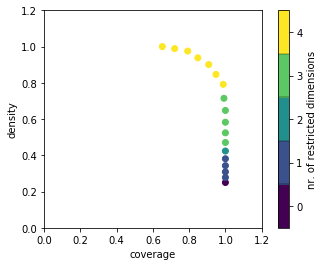

In [87]:
prim_alg = prim.Prim(x, y_deaths, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

In [88]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000,0.250000,0,1.000,0.250000,0
1,1.000,0.277778,1,0.900,0.277778,1
2,1.000,0.308642,2,0.810,0.308642,1
3,1.000,0.342936,3,0.729,0.342936,1
4,1.000,0.381098,4,0.656,0.381098,1
5,1.000,0.423729,5,0.590,0.423729,2
6,1.000,0.470810,6,0.531,0.470810,3
7,1.000,0.524109,7,0.477,0.524109,3
8,1.000,0.582751,8,0.429,0.582751,3
9,1.000,0.647668,9,0.386,0.647668,3


coverage       0.908
density     0.900794
id                13
mass           0.252
mean        0.900794
res_dim            4
Name: 13, dtype: object

             box 13                                          
                min       max                       qp values
A.3_pfail  0.477342  0.999727  [2.9694971606974602e-40, -1.0]
A.1_pfail  0.409404  0.999652   [2.685175117301158e-34, -1.0]
A.2_pfail  0.091923  0.999462  [1.0648260742855201e-05, -1.0]
A.5_pfail  0.083062  0.999838  [2.9607771150428835e-05, -1.0]



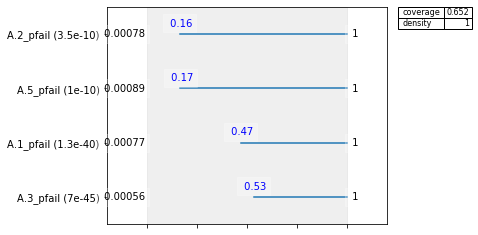

In [89]:
box1.inspect(13)
box1.inspect(style='graph')
plt.show()

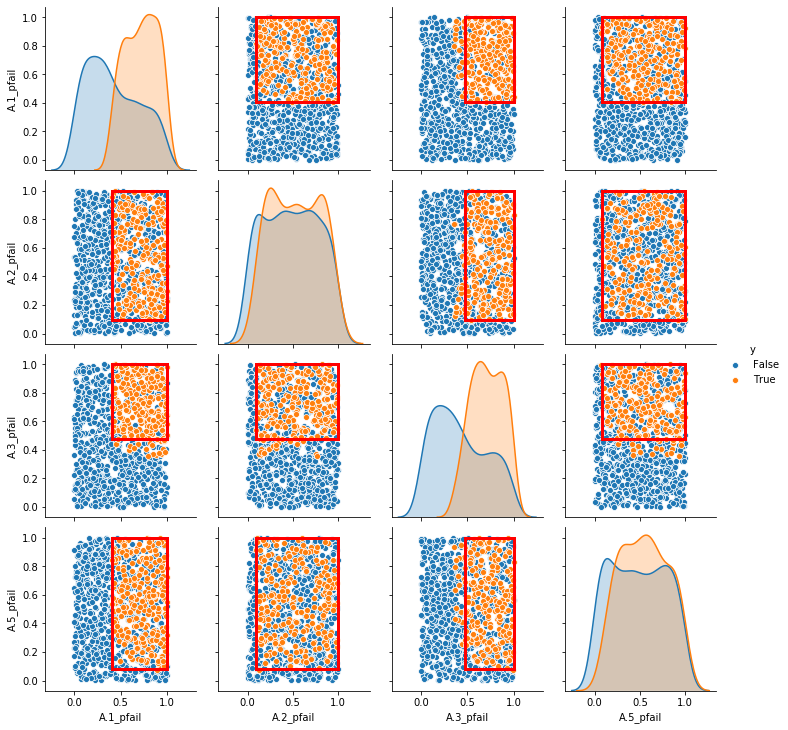

In [70]:
box1.select(13)
box1.show_pairs_scatter()
plt.show()

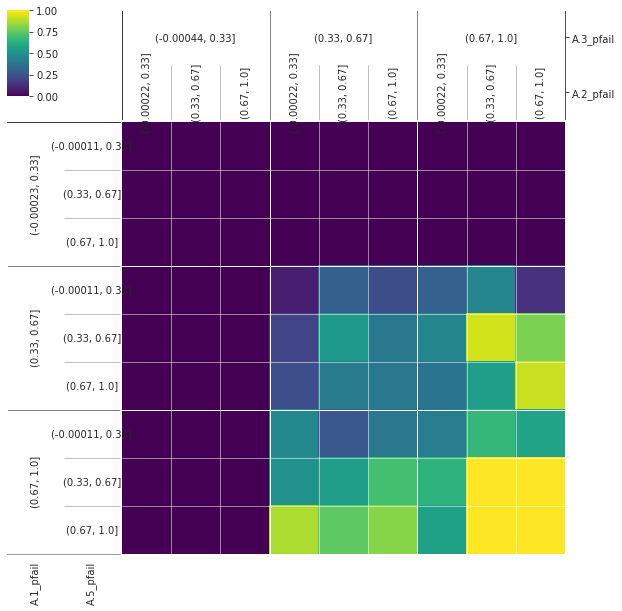

In [90]:
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(x,y_deaths, 2, bin_labels = True)
plt.show()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


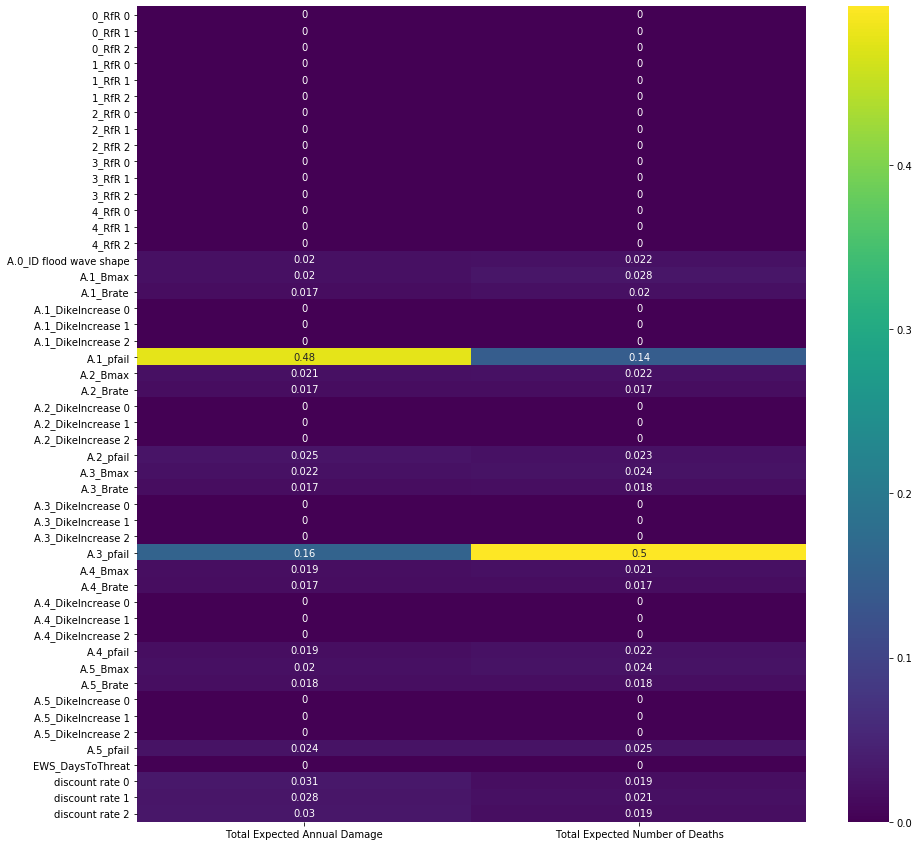

In [47]:
from ema_workbench.analysis import feature_scoring

x = experiments
y = total_results
fig, ax = plt.subplots(figsize=(15,15)) 
fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()
#plt.savefig('feature_scoring.png')

In [3]:
from ema_workbench.em_framework.evaluators import BaseEvaluator
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation


dike_model, planning_steps = get_model_for_problem_formulation(1)

policies = [Policy("base case without policy", **{k.name: 0 for k in dike_model.levers})]
problem = get_SALib_problem(dike_model.uncertainties)


In [ ]:
tic = time.time()

#with MultiprocessingEvaluator(dike_model) as evaluator:
#    sa_results = evaluator.perform_experiments(scenarios=250, policies = policies,
                                               levers_sampling= 'sobol')

toc = time.time()

print('Total run time:{} min'.format((toc - tic)/60))

# Save the results
#utilities.save_results(sa_results, 'results/base_case_sobol.csv')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 250 scenarios * 1 policies * 1 model(s) = 250 experiments
[MainProcess/INFO] 25 cases completed
[MainProcess/INFO] 50 cases completed
[MainProcess/INFO] 75 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 125 cases completed
[MainProcess/INFO] 150 cases completed
[MainProcess/INFO] 175 cases completed


In [10]:
# Save the results
utilities.load_results(sa_results, 'results/base_case_sobol.csv')

[MainProcess/INFO] results saved successfully to C:\Users\na0e2\Documents\EPA1361\epa1361_open-master\final assignment\results\base_case_sobol.csv


In [ ]:
utilities.load_results(sa_results, 'results/base_case_sobol.csv')

experiments, outcomes = sa_results

problem = get_SALib_problem(dike_model.uncertainties)
Si = sobol.analyze(problem, outcomes['max_P'],
                   calc_second_order=True, print_to_console=False)

In [156]:
#for next analysis

tic = time.time()

#with MultiprocessingEvaluator(dike_model) as evaluator:
#    results_75 = evaluator.perform_experiments(scenarios=1000, policies=75)
#
toc = time.time()

print('Total run time:{} min'.format((toc - tic)/60))

# Save the results
utilities.save_results(results_75, 'results/base_case_75.csv')


Total run time:0.0 min


[MainProcess/INFO] results saved successfully to C:\Users\na0e2\Documents\EPA1361\epa1361_open-master\final assignment\results\base_case_75.csv
